## Tarefa 6 - Simulated Annealing

**Nome:** Gabriel Christo **DRE:** 117217732

**Nome:** João Vitor de Freitas **DRE:** 117055449

In [ ]:
import math
import copy
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Questao 1, letra a)
# Questao 2, letra a)
'''
Retorna tabuleiro de tamanho N*N
# Modelagem:
# O tabuleiro é representado por um vetor onde cada indíce do vetor representa a coluna e o valor
# nesse índice representa a linha que se encontra a rainha das respectiva coluna
# As rainhas estão sempre em colunas diferentes e são identificadas pelo número da sua coluna
# A representação é feita guardando a linha de cada rainha
'''
def tabuleiro(N, Q = 1):
    tabuleiros = []
    for i in range(0, Q):
        tabuleiros.append([random.randint(0,N-1) for j in range(0,N)])
    return tabuleiros

In [ ]:
# Questao 2, letra b)
'''
Retorna uma lista de sublistas
Cada sublista é vizinha do estado atual, contendo a configuração das rainhas
'''
def todosVizinhos(tabuleiro):
  vizinhos = []
  posTabuleiroEditadas = copy.deepcopy(tabuleiro)
  for item in tabuleiro:
    i = posTabuleiroEditadas.index(item)
    #print(f"Item com index {i}: {item}")
    for y in range(0, len(tabuleiro)):
      vizinhoAtual = copy.deepcopy(tabuleiro)
      if item == y:
        continue
      vizinhoAtual[i] = y
      posTabuleiroEditadas[i] = -1
      vizinhos.append(vizinhoAtual)
  return vizinhos

In [ ]:
# Questao 2, letra c)
'''
Retorna vizinho aleatório
'''
def umVizinho(vizinhos):
  return random.choice(vizinhos)

In [ ]:
# Questao 2, letra d)
'''
Retorna número de ataques possíveis entre rainhas, de maneira comutativa
'''
def numeroAtaques(tabuleiro):
  numeroAtaque = 0
  for i in range(0, len(tabuleiro)):
    for j in range(i+1, len(tabuleiro)):
      if tabuleiro[i] == tabuleiro[j]: # ataque na mesma linha
        numeroAtaque += 1
      elif abs(j - i) == abs(tabuleiro[j] - tabuleiro[i]): # ataque na diagonal, com distancia vertical e horizontal iguais
        numeroAtaque += 1
  return numeroAtaque

### Algoritmo
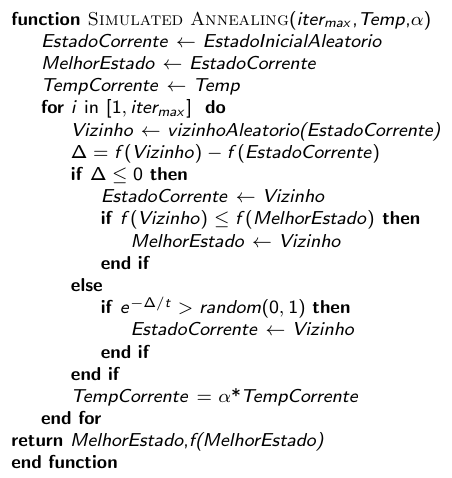

In [ ]:
# Questao 4, letra a)
'''
Retorna o melhor nó encontrado dentro do número máximo de iterações estipulado.
Além disso, retorna um booleano indicando se o nó encontrado é uma solução
para o problema das N rainhas, e o número de iterações até chegar nesse nó.
'''
def simulatedAnnealing(tabuleiro, temperaturaInicial, maxIteracoes, fatorDecaimento):
  atual = tabuleiro
  melhor = atual
  iteracoes = 0
  numeroDeMelhoras = 0
  numeroDeTrocasAleatorias = 0 
  Temp = temperaturaInicial

  # arrays para guardar estado de execucao ao longo das iteracoes
  array_numeroDeMelhoras = []
  array_numeroDeTrocasAleatorias = []
  array_numeroAtaques = []
  array_temperatura = []

  while iteracoes < maxIteracoes and numeroAtaques(melhor) != 0:
    iteracoes += 1
    vizinhosAtuais = todosVizinhos(atual)
    proximo = umVizinho(vizinhosAtuais)
    delta = numeroAtaques(proximo) - numeroAtaques(atual)
    
    # melhora ou troca aleatoria
    if delta <= 0:
      atual = proximo
      numeroDeMelhoras += 1
    else:
        r = random.random()
        p = math.exp((-1*delta)/Temp)
        if p > r:
          print(f"Troca aleatoria ->\t ataques atual: {numeroAtaques(atual)} e ataques proximo: {numeroAtaques(proximo)};\t estocasticidade: {p} que eh maior que o random: {r}")
          atual = proximo
          numeroDeTrocasAleatorias += 1

    # verificando numero de ataques atual e comparando com melhor encontrado
    if numeroAtaques(atual) < numeroAtaques(melhor):
        melhor = atual

    TempNova = fatorDecaimento*Temp
    if TempNova > 0: # evita divisao por zero
      Temp = TempNova

    # atualizando valores
    array_numeroDeMelhoras.append(numeroDeMelhoras)
    array_numeroDeTrocasAleatorias.append(numeroDeTrocasAleatorias)
    array_numeroAtaques.append(numeroAtaques(atual))
    array_temperatura.append(Temp)
  
  encontrado = numeroAtaques(melhor) == 0

  return {"melhor":melhor, "encontrado": encontrado, "iteracoes":iteracoes, "num_melhoras":numeroDeMelhoras, "num_trocas_aleatorias":numeroDeTrocasAleatorias,
          "out_melhoras":array_numeroDeMelhoras, "out_trocas":array_numeroDeTrocasAleatorias, "out_ataques": array_numeroAtaques, "out_temperatura": array_temperatura }

In [ ]:
# cria os graficos de acordo com resultado da busca
def criarGraficos(resultado):
  # grafico numero de ataques
  plt.scatter(range(0, resultado["iteracoes"]), resultado["out_ataques"], label='ataques')
  plt.legend(loc="upper right")
  plt.show()
  # numero de melhoras e trocas aleatorias
  plt.plot(range(0, resultado["iteracoes"]), resultado["out_trocas"], label='trocas aleatorias')
  plt.plot(range(0, resultado["iteracoes"]), resultado["out_melhoras"], label='melhoras')
  plt.plot(range(0, resultado["iteracoes"]), resultado["out_temperatura"], label='temperatura')
  plt.legend(loc="upper right")
  plt.show()

# testa N casos calculando sucessos e media das iteracoes
def testarCasos(tabuleiro, tempInicial, maxIteracoes, fatorDecaimento, graficos = True, numTestes = 10):
  totalSucessos = 0
  listaIteracoes = []
  for i in range(0, numTestes):
    print(f"\n\nEXECUTANDO CASO {i}")
    resultado = simulatedAnnealing(tabuleiro,tempInicial,maxIteracoes,fatorDecaimento)
    print(f"Tabuleiro final: {resultado['melhor']} com {resultado['iteracoes']} iteracoes e {'sucesso na busca' if resultado['encontrado'] == True else 'falha na busca'}")
    if graficos == True: criarGraficos(resultado)
    if resultado['encontrado'] == True:
      totalSucessos += 1
      listaIteracoes.append(resultado['iteracoes'])

  media = np.average(listaIteracoes) if totalSucessos > 0 else "nao houve busca com sucesso"
  desvio = np.std(listaIteracoes) if totalSucessos > 0 else "nao houve busca com sucesso"
  print(f'\n\nRelatorio ->\t {totalSucessos} de {numTestes} buscas com sucesso;\tmedia das iteracoes: {media};\tdesvio padrao das iteracoes: {desvio}')



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.3070961314036591
Tabuleiro final: [2, 0, 3, 1] com 6 iteracoes e sucesso na busca


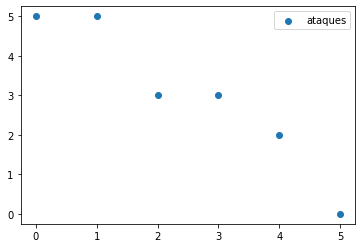

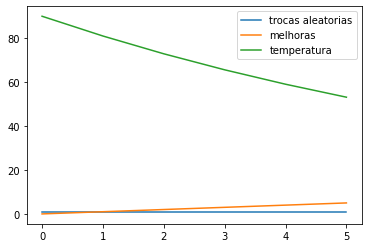



EXECUTANDO CASO 1
Tabuleiro final: [2, 0, 3, 1] com 5 iteracoes e sucesso na busca


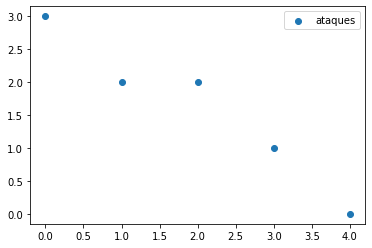

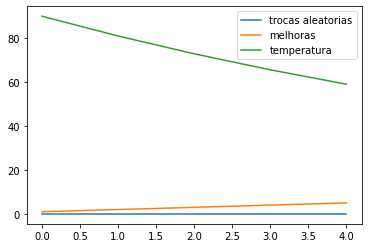



EXECUTANDO CASO 2
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.5674828951443476
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.38273725570777695
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9813591658699202 que eh maior que o random: 0.5193133318644916
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9382557515469004 que eh maior que o random: 0.4621131464448769
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.9450190652710664
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9210392440263622 que eh maior que o random: 0.11037997804323274
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.8821739667436626 que eh maior que o random: 0.2

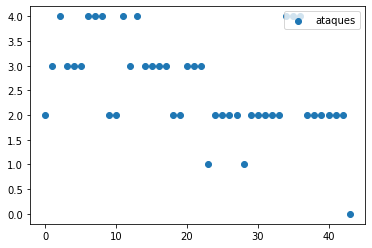

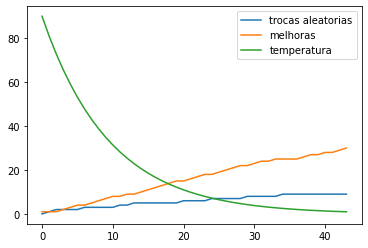



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 3;	 estocasticidade: 0.9756109800648459 que eh maior que o random: 0.14965058977698453
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.8582552866424453
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 3;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.8194956842388564
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.1134599064631
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.7152861600677163
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9074301232399241 que eh maior que o random: 0.3030843274615854
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9286462763893978 que eh maior que o random: 0.34670

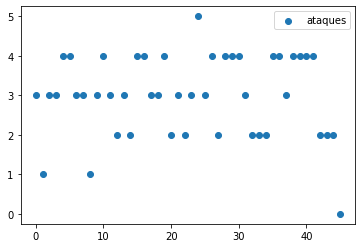

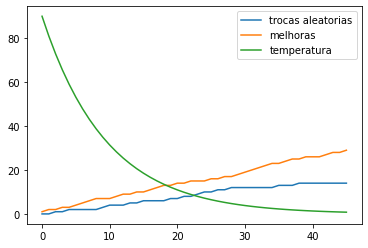



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.6447492772834424
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 3;	 estocasticidade: 0.966696997332686 que eh maior que o random: 0.8447957441131906
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9813591658699202 que eh maior que o random: 0.6801965304114757
Tabuleiro final: [2, 0, 3, 1] com 11 iteracoes e sucesso na busca


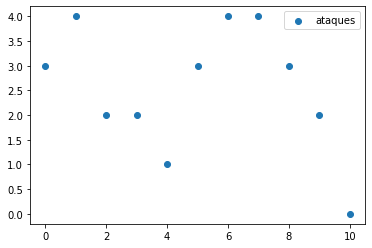

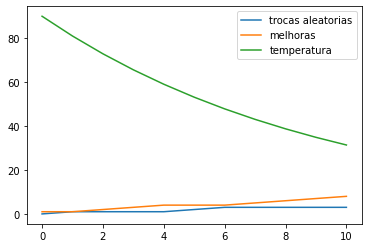



EXECUTANDO CASO 5
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.05041450640522971
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.2187598397656757
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.5915165074272685
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9813591658699202 que eh maior que o random: 0.30113687891612717
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.4024307958193447
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9686360263519526 que eh maior que o random: 0.15890469561350784
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9652124353467894 que eh maior que o random: 0.

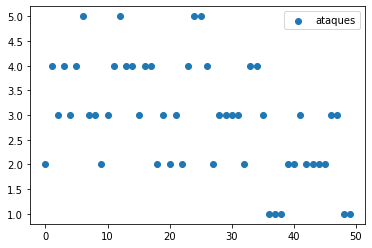

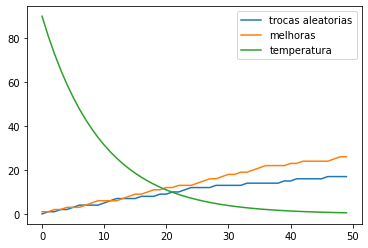



EXECUTANDO CASO 6
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.4462594256956146
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.966696997332686 que eh maior que o random: 0.8348309173809111
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9590471575609717 que eh maior que o random: 0.37153373227325837
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.8021004780280789
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.05973329503214364
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9286462763893978 que eh maior que o random: 0.20707508134885932
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9210392440263622 que eh maior que o random: 0.5

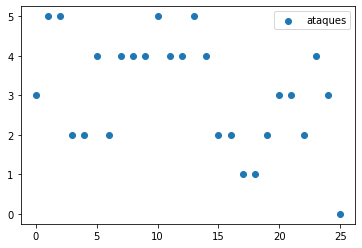

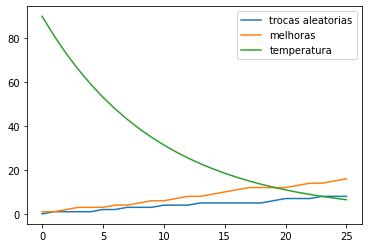



EXECUTANDO CASO 7
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.7482365193185351
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.4964337760399299
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.22507440900317077
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.086461760620133
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9686360263519526 que eh maior que o random: 0.14780171767238326
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9074301232399241 que eh maior que o random: 0.4636084096299453
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9126600470402092 que eh maior que o random: 0.65

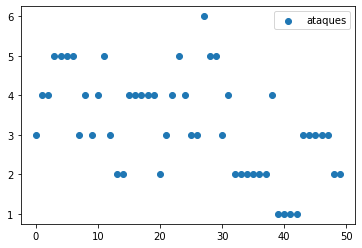

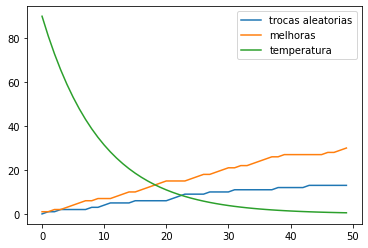



EXECUTANDO CASO 8
Tabuleiro final: [2, 0, 3, 1] com 3 iteracoes e sucesso na busca


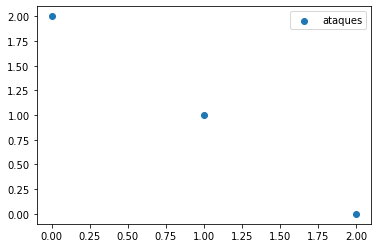

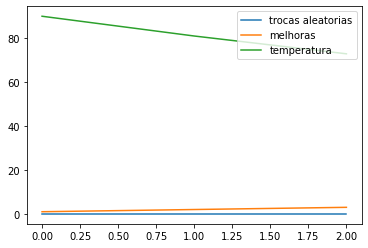



EXECUTANDO CASO 9
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.21568345239216336
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.7593802654640724
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.975153255285173
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.4779934466369483
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.5467376513628522
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9525912676693631 que eh maior que o random: 0.846763766729505
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9474643644864255 que eh maior que o random: 0.0328

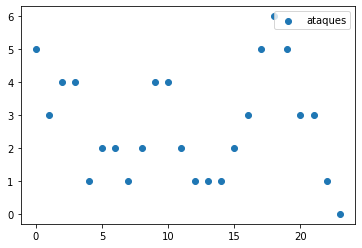

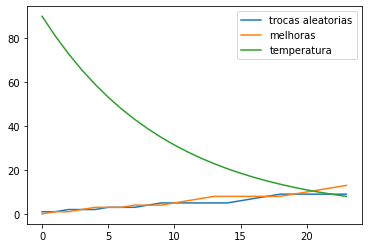



Relatorio ->	 8 de 10 buscas com sucesso;	media das iteracoes: 20.625;	desvio padrao: 16.17047850250573


In [ ]:
# Questao 4 letra c) com 4 rainhas
# Primeiro item
T = tabuleiro(4)[0]
testarCasos(T, 100, 50, 0.9)

# Conclusao: metade das buscas com sucesso; diminuindo alpha numero de sucessos aumenta



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.7423555490736313
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.6287680209984126
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9630658124369055 que eh maior que o random: 0.8679001186479134
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.3903475774072268
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9243334838985968 que eh maior que o random: 0.6610276539314086
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9572291961951885 que eh maior que o random: 0.9483447132572983
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9474643644864255 que eh maior que o random: 0.139

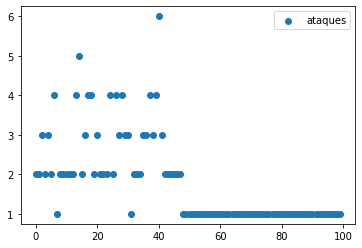

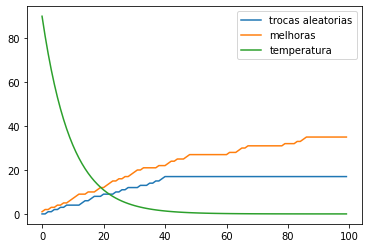



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.5134155409677517
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9699767682248562 que eh maior que o random: 0.7207142299610697
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.7987476475006458
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9686360263519526 que eh maior que o random: 0.6910650136151858
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9652124353467894 que eh maior que o random: 0.3573585988560152
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9418001614474214 que eh maior que o random: 0.19427510245742563
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9286462763893978 que eh maior que o random: 0.47

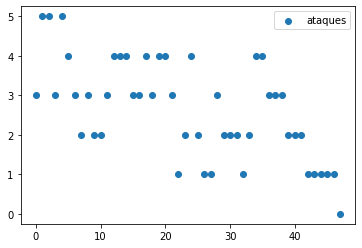

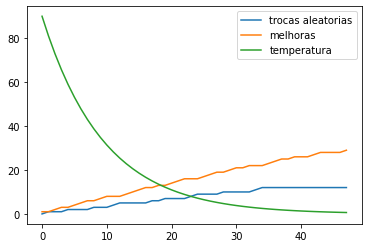



EXECUTANDO CASO 2
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.23007092278235375
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.6117249887638357
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.9383292573193496
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9590471575609717 que eh maior que o random: 0.5192817937300253
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9382557515469004 que eh maior que o random: 0.2329500839626577
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9074301232399241 que eh maior que o random: 0.8602114197687546
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 3;	 estocasticidade: 0.8752468955286333 que eh maior que o random: 0.18

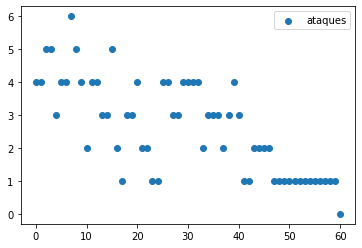

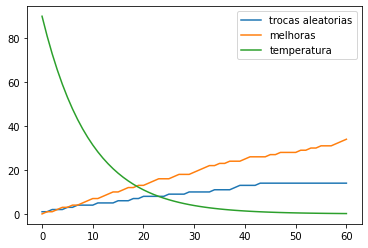



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9801986733067553 que eh maior que o random: 0.5510397997034138
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9793095310273314 que eh maior que o random: 0.16714930042222964
Tabuleiro final: [1, 3, 0, 2] com 9 iteracoes e sucesso na busca


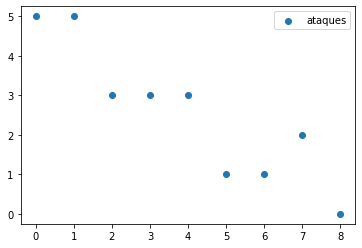

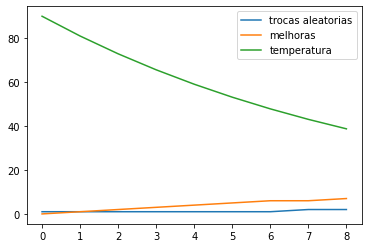



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9801986733067553 que eh maior que o random: 0.3994327649206567
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.10537430832180317
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9382557515469004 que eh maior que o random: 0.4214370161645743
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.6104196807050127
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9525912676693631 que eh maior que o random: 0.771181764247227
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9474643644864255 que eh maior que o random: 0.3058628354811336
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9210392440263622 que eh maior que o random: 0.861

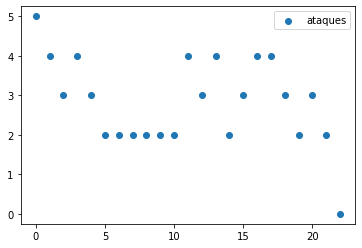

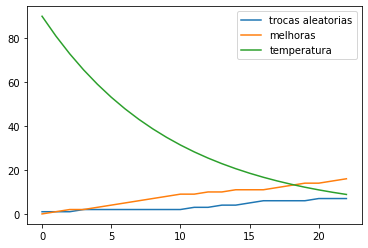



EXECUTANDO CASO 5
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.5112017307635304
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.7922824423233138
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.12074946363639472
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9793095310273314 que eh maior que o random: 0.42743568379063057
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.974518527484519 que eh maior que o random: 0.16967141925020346
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.3145088295623828
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.0

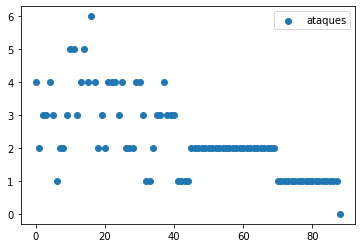

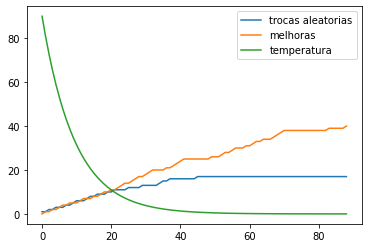



EXECUTANDO CASO 6
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.7394958059619878
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 4;	 estocasticidade: 0.9553048860122411 que eh maior que o random: 0.4251348300626472
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9793095310273314 que eh maior que o random: 0.32697375916680227
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.93163504534808 que eh maior que o random: 0.5975562533685447
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 3;	 estocasticidade: 0.8869875441023889 que eh maior que o random: 0.3722574895632207
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9126600470402092 que eh maior que o random: 0.6284945815833405
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 3;	 estocasticidade: 0.7089717155473371 que eh maior que o random: 0.3724

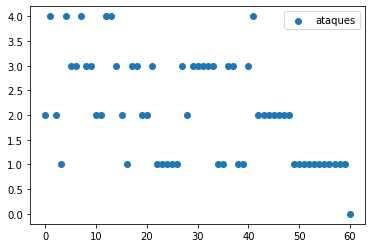

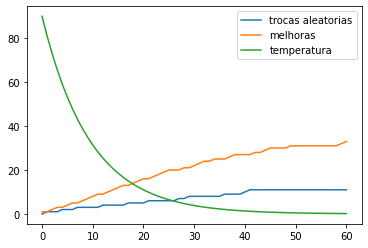



EXECUTANDO CASO 7
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.4823374847644215
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.09490898897426925
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.066993670963859
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.059137182267014365
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.5513105383758005
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.7423128290495796
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9525912676693631 que eh maior que o random: 0.4

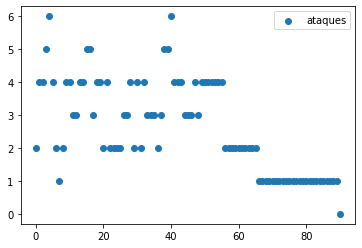

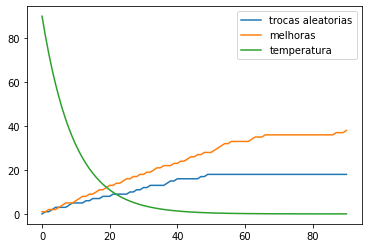



EXECUTANDO CASO 8
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 3;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.32323807775053925
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.36490548794440636
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.7405917337093966
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9590471575609717 que eh maior que o random: 0.8243967406130354
Troca aleatoria ->	 ataques atual: 1 e ataques proximo: 2;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.7790221771047294
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9162877340484868 que eh maior que o random: 0.6455485352411818
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.8623839066518937 que eh maior que o random: 0.8

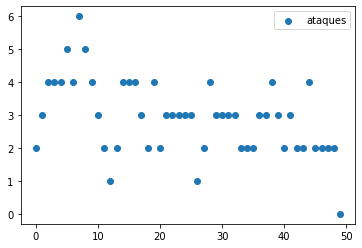

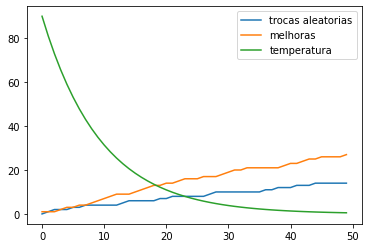



EXECUTANDO CASO 9
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.2830242301483995
Troca aleatoria ->	 ataques atual: 2 e ataques proximo: 4;	 estocasticidade: 0.9699767682248562 que eh maior que o random: 0.8810829537212794
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.6184496706150096
Tabuleiro final: [2, 0, 3, 1] com 15 iteracoes e sucesso na busca


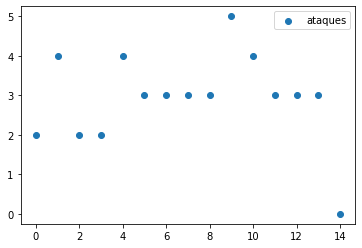

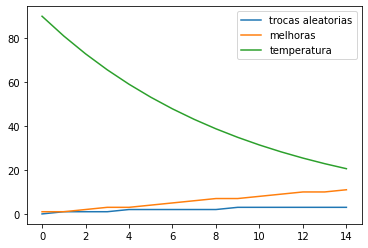



Relatorio ->	 9 de 10 buscas com sucesso;	media das iteracoes: 49.666666666666664;	desvio padrao: 28.051539866625664


In [ ]:
# Questao 4 letra c) com 4 rainhas
# Segundo item
T = tabuleiro(4)[0]
testarCasos(T,100,100,0.9)

# Conclusao: geralmente todas as buscas com sucesso, devido maior numero de iteracoes



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9801986733067553 que eh maior que o random: 0.7888908357055479
Tabuleiro final: [0, 0, 3, 1] com 50 iteracoes e falha na busca


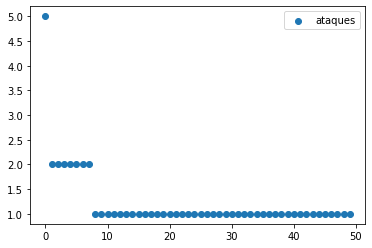

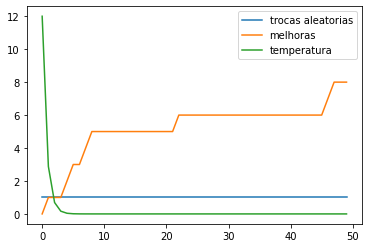



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.7066482778577162 que eh maior que o random: 0.4657153780374411
Tabuleiro final: [2, 0, 3, 1] com 19 iteracoes e sucesso na busca


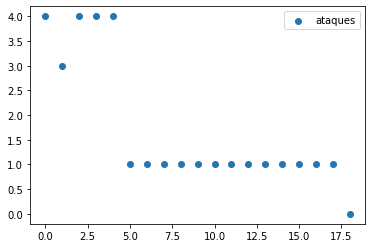

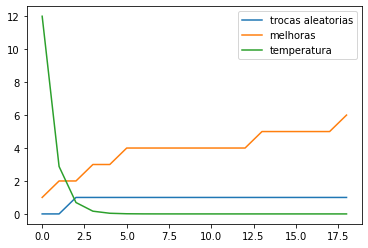



EXECUTANDO CASO 2
Tabuleiro final: [2, 0, 3, 1] com 34 iteracoes e sucesso na busca


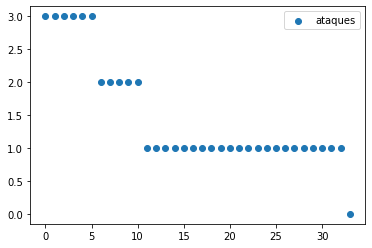

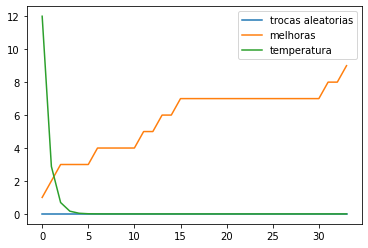



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9200444146293233 que eh maior que o random: 0.5948104914258564
Tabuleiro final: [3, 1, 0, 2] com 50 iteracoes e falha na busca


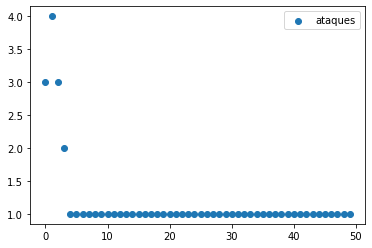

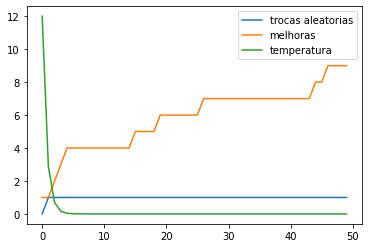



EXECUTANDO CASO 4
Tabuleiro final: [1, 2, 0, 3] com 50 iteracoes e falha na busca


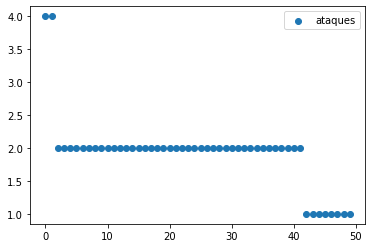

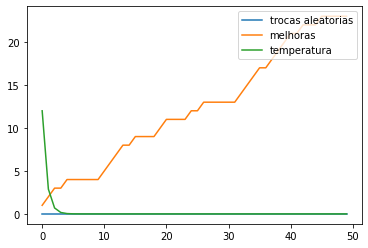



EXECUTANDO CASO 5
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.7066482778577162 que eh maior que o random: 0.6827722701970602
Tabuleiro final: [2, 0, 3, 1] com 36 iteracoes e sucesso na busca


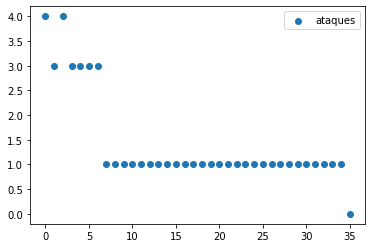

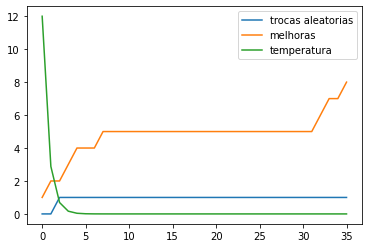



EXECUTANDO CASO 6
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.7066482778577162 que eh maior que o random: 0.20036962010232529
Tabuleiro final: [1, 3, 2, 0] com 50 iteracoes e falha na busca


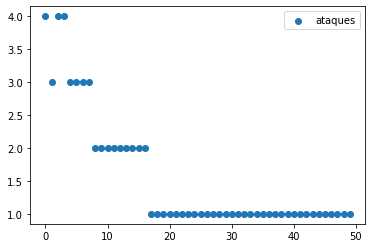

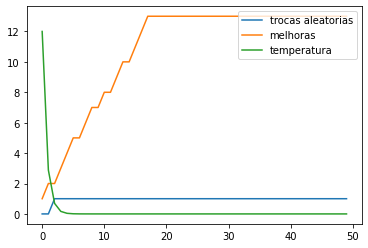



EXECUTANDO CASO 7
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9200444146293233 que eh maior que o random: 0.4022127476012485
Tabuleiro final: [2, 0, 3, 1] com 22 iteracoes e sucesso na busca


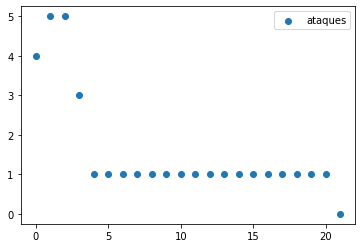

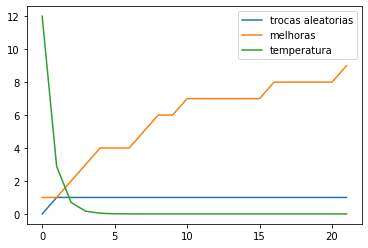



EXECUTANDO CASO 8
Tabuleiro final: [1, 3, 2, 0] com 50 iteracoes e falha na busca


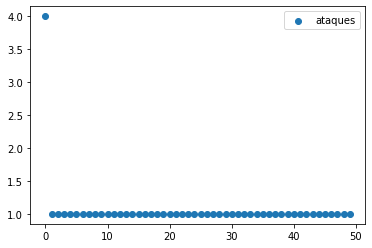

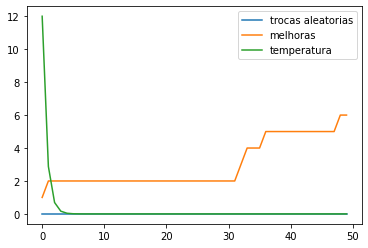



EXECUTANDO CASO 9
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9200444146293233 que eh maior que o random: 0.3154909589560645
Tabuleiro final: [0, 2, 3, 1] com 50 iteracoes e falha na busca


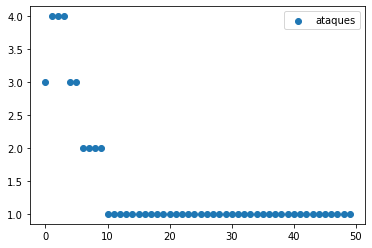

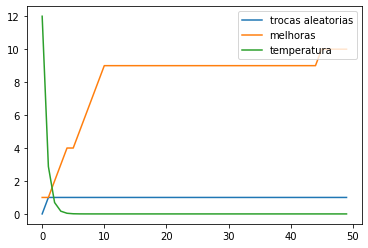



Relatorio ->	 4 de 10 buscas com sucesso;	media das iteracoes: 27.75;	desvio padrao: 7.361215932167728


In [ ]:
# Questao 4 letra c) com 4 rainhas
# Terceiro item
T = tabuleiro(4)[0]
testarCasos(T,50,50,0.24)

# Conclusao: temperatura cai rapido e poucas trocas aleatorias



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 8;	 estocasticidade: 0.9704455335485082 que eh maior que o random: 0.10263625281939592
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.7411458029970416
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 10;	 estocasticidade: 0.9596829942513829 que eh maior que o random: 0.7725239077486457
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 10;	 estocasticidade: 0.9630658124369055 que eh maior que o random: 0.20554097967627816
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.2540977643260003
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.9162877340484868 que eh maior que o random: 0.6708485505113807
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 11;	 estocasticidade: 0.9074301232399241 que eh maior que o random: 

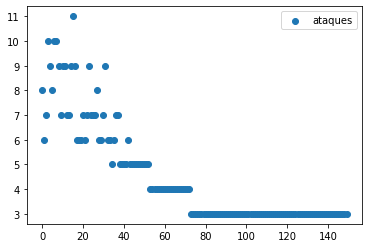

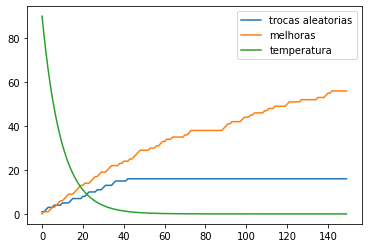



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 8;	 estocasticidade: 0.9672161004820059 que eh maior que o random: 0.9180159053276463
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9699767682248562 que eh maior que o random: 0.945764753458892
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.7399565287780304
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9813591658699202 que eh maior que o random: 0.8563097297579172
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9382557515469004 que eh maior que o random: 0.9100501082749183
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9162877340484868 que eh maior que o random: 0.09996156274446533
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.8869875441023889 que eh maior que o random: 0.245

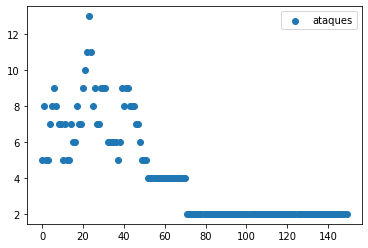

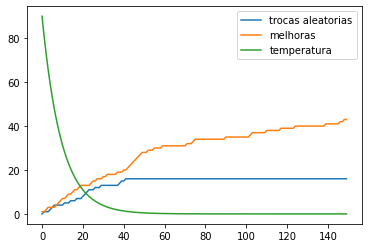



EXECUTANDO CASO 2
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9801986733067553 que eh maior que o random: 0.30620627326821315
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.9756109800648459 que eh maior que o random: 0.06419845418025594
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.7318934996190167
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9630658124369055 que eh maior que o random: 0.04568809596773782
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9793095310273314 que eh maior que o random: 0.7091326580070337
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.974518527484519 que eh maior que o random: 0.647898472693799
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.03

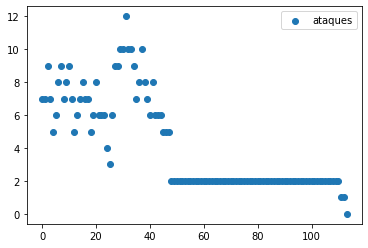

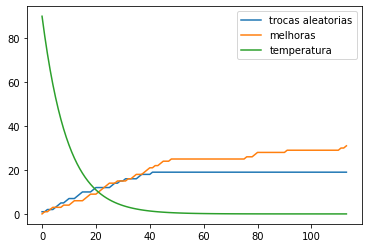



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.032539806631115
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.19229269666749071
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9729380749443651 que eh maior que o random: 0.3268316967317576
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 8;	 estocasticidade: 0.9197714504257793 que eh maior que o random: 0.5687863198614413
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.791703556540055
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.2670356785415381
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 10;	 estocasticidade: 0.9382557515469004 que eh maior que o random: 0.518

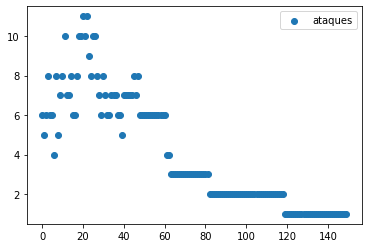

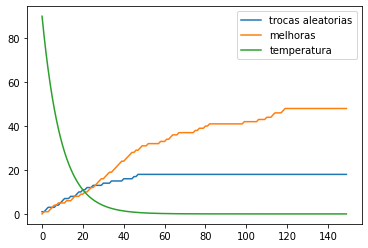



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.1357938348586467
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.6037579959770359
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.6353785102181843
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9699767682248562 que eh maior que o random: 0.7702165438928471
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 11;	 estocasticidade: 0.9504637425653076 que eh maior que o random: 0.7247078615295869
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9813591658699202 que eh maior que o random: 0.8980891077918063
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9525912676693631 que eh maior que o random: 0.

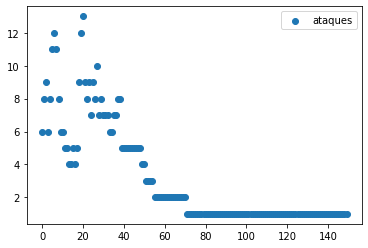

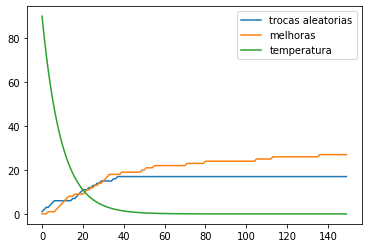



EXECUTANDO CASO 5
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.9183096066894916
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 10;	 estocasticidade: 0.9466084976764471 que eh maior que o random: 0.06640415476951145
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 12;	 estocasticidade: 0.9699767682248562 que eh maior que o random: 0.5076665586328933
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 11;	 estocasticidade: 0.9813591658699202 que eh maior que o random: 0.3921990113734909
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 15;	 estocasticidade: 0.9197714504257793 que eh maior que o random: 0.1857484290474295
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 10;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.08385725580445402
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 11;	 estocasticidade: 0.9572291961951885 que eh maior que o r

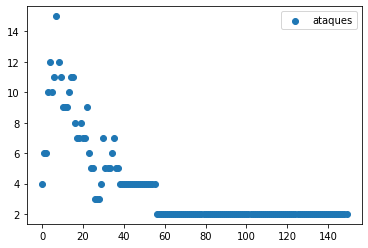

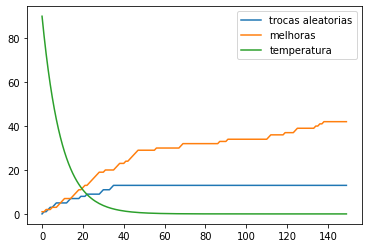



EXECUTANDO CASO 6
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9801986733067553 que eh maior que o random: 0.5983653879524979
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9756109800648459 que eh maior que o random: 0.542701940636196
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 10;	 estocasticidade: 0.9729380749443651 que eh maior que o random: 0.3209530985325233
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 12;	 estocasticidade: 0.9699767682248562 que eh maior que o random: 0.6134645150227694
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.7802976911924561
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.974518527484519 que eh maior que o random: 0.2239213673984236
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9162877340484868 que eh maior que o random: 0.36

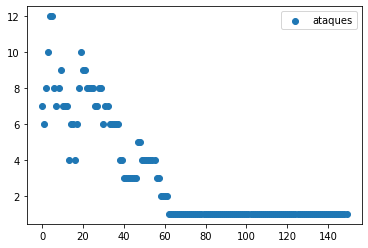

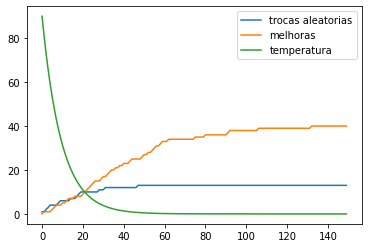



EXECUTANDO CASO 7
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 8;	 estocasticidade: 0.9704455335485082 que eh maior que o random: 0.23533403155243748
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 10;	 estocasticidade: 0.9756109800648459 que eh maior que o random: 0.5323267522910384
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 11;	 estocasticidade: 0.9553048860122411 que eh maior que o random: 0.049220958383267344
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.7333384014461082
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.93163504534808 que eh maior que o random: 0.08238707423099556
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9243334838985968 que eh maior que o random: 0.20246087104236
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 10;	 estocasticidade: 0.8770973711467438 que eh maior que o random: 

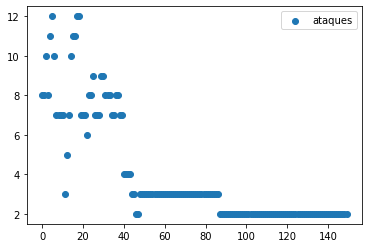

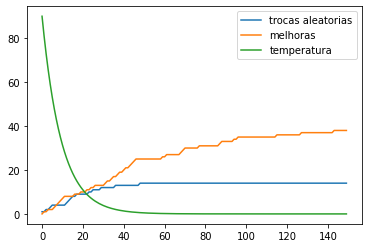



EXECUTANDO CASO 8
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.2624707706823397
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 9;	 estocasticidade: 0.9672161004820059 que eh maior que o random: 0.844522611662053
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 9;	 estocasticidade: 0.9596829942513829 que eh maior que o random: 0.3822055797600834
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 11;	 estocasticidade: 0.9590471575609717 que eh maior que o random: 0.002977060362067463
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 11;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.01795932931812727
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.5499905682244446
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 9;	 estocasticidade: 0.8644100114184857 que eh maior que o random:

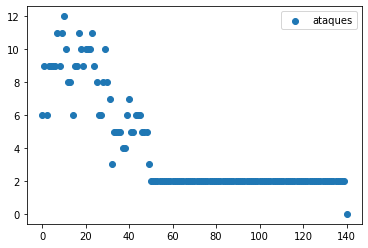

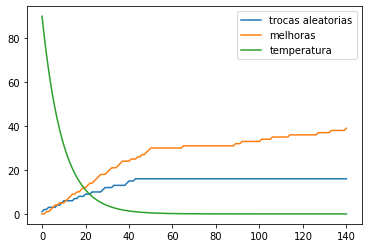



EXECUTANDO CASO 9
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 8;	 estocasticidade: 0.9672161004820059 que eh maior que o random: 0.18875787596614635
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 9;	 estocasticidade: 0.9553048860122411 que eh maior que o random: 0.8169046653477392
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 14;	 estocasticidade: 0.9188104460114699 que eh maior que o random: 0.12116817796951618
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 18;	 estocasticidade: 0.9274957590847569 que eh maior que o random: 0.03527657060344458
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 10;	 estocasticidade: 0.9686360263519526 que eh maior que o random: 0.3692214925113124
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 14;	 estocasticidade: 0.8543923894561175 que eh maior que o random: 0.45236369810068844
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 10;	 estocasticidade: 0.9418001614474214 que eh maior que o ra

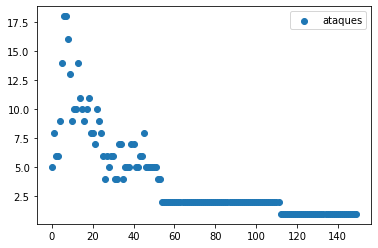

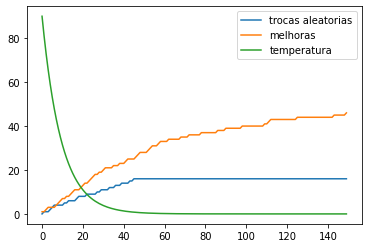



Relatorio ->	 2 de 10 buscas com sucesso;	media das iteracoes: 127.5;	desvio padrao: 13.5


In [ ]:
# Questao 4 letra d) com 8 rainhas
# Primeiro item
T = tabuleiro(8)[0]
testarCasos(T,100,150,0.9)

# Conclusao: com maximo de 50 iteracoes nao foi obtido sucesso, mas apenas a partir de 150 iteracoes



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 10;	 estocasticidade: 0.9704455335485082 que eh maior que o random: 0.7089201595601111
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 10;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.9744056708005746
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 12;	 estocasticidade: 0.966696997332686 que eh maior que o random: 0.27922722239248754
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.04228279380086586
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.8559450681349181
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 11;	 estocasticidade: 0.9088283228802545 que eh maior que o random: 0.6140785839391255
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 10;	 estocasticidade: 0.9243334838985968 que eh maior que o random

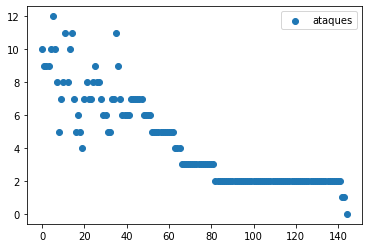

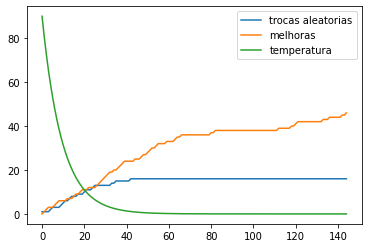



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.9374460265392164
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9793095310273314 que eh maior que o random: 0.03585975470668601
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.6466879747662564
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.93163504534808 que eh maior que o random: 0.6172857374327532
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 12;	 estocasticidade: 0.8886751340970557 que eh maior que o random: 0.4180544610302148
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 12;	 estocasticidade: 0.9074301232399241 que eh maior que o random: 0.3852914876813335
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 13;	 estocasticidade: 0.9474643644864255 que eh maior que o random: 0

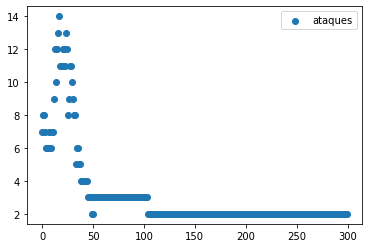

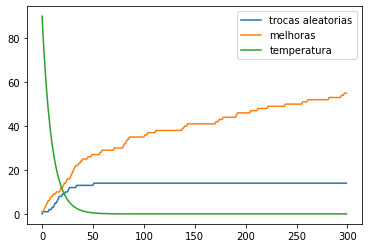



EXECUTANDO CASO 2
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.9515063111307457
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.27695373988362915
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.33868789452867554
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 11;	 estocasticidade: 0.9451134623709186 que eh maior que o random: 0.5424837541042141
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.974518527484519 que eh maior que o random: 0.5509895327554724
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 10;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.8247243320926723
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 11;	 estocasticidade: 0.93163504534808 que eh maior que o random: 0.1

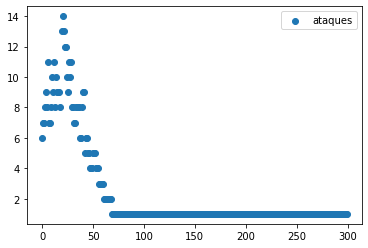

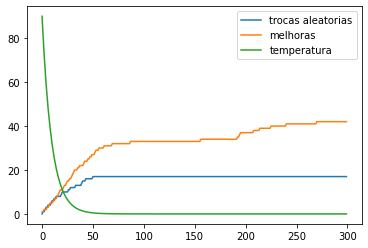



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.9544331725796238
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9630658124369055 que eh maior que o random: 0.6116941551288708
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.974518527484519 que eh maior que o random: 0.8518895753861228
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.4856114199399526
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 11;	 estocasticidade: 0.880323855310839 que eh maior que o random: 0.7402872000531178
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9652124353467894 que eh maior que o random: 0.9381357082857507
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9525912676693631 que eh maior que o random: 0.74

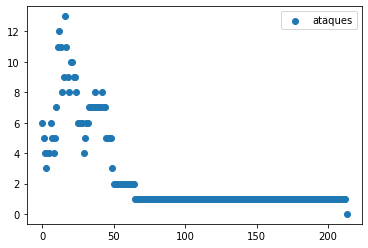

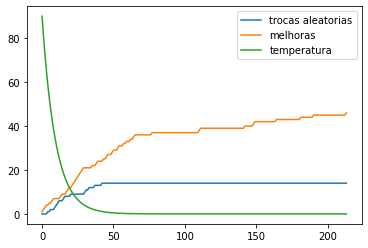



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9756109800648459 que eh maior que o random: 0.4620065258994185
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.6691066720218375
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9630658124369055 que eh maior que o random: 0.9028074787228323
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.08129499513927763
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9243334838985968 que eh maior que o random: 0.33844456659909816
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 11;	 estocasticidade: 0.8644100114184857 que eh maior que o random: 0.8015710753488099
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.8752468955286333 que eh maior que o random: 0.

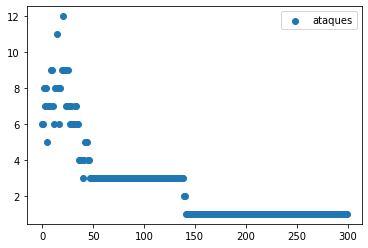

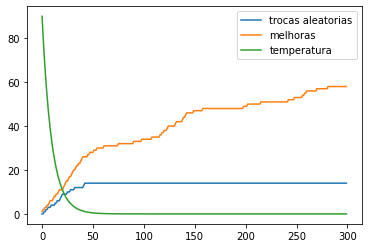



EXECUTANDO CASO 5
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9729380749443651 que eh maior que o random: 0.856947270830968
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 6;	 estocasticidade: 0.9451134623709186 que eh maior que o random: 0.7614781304913777
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.5372896329613477
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.16447359728384758
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9652124353467894 que eh maior que o random: 0.7923980106104964
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.9243334838985968 que eh maior que o random: 0.6497873538251392
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.897688721971666 que eh maior que o random: 0.1179

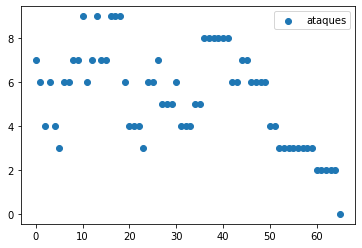

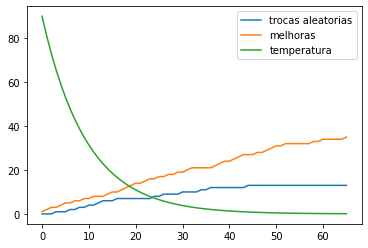



EXECUTANDO CASO 6
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.9756109800648459 que eh maior que o random: 0.6712961012711666
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.9314084418456611
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 9;	 estocasticidade: 0.9590471575609717 que eh maior que o random: 0.027262255113666423
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 8;	 estocasticidade: 0.8505280744695161 que eh maior que o random: 0.17902898060729078
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9355463085965512 que eh maior que o random: 0.633559092351249
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 10;	 estocasticidade: 0.7601986907552856 que eh maior que o random: 0.03403320150160183
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 10;	 estocasticidade: 0.7128471885901719 que eh maior que o random: 

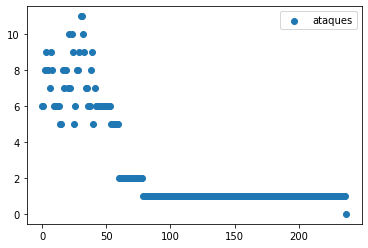

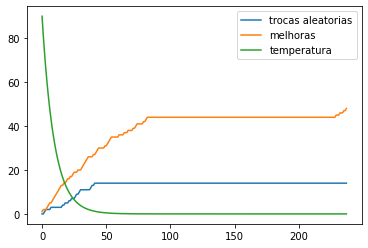



EXECUTANDO CASO 7
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 12;	 estocasticidade: 0.951229424500714 que eh maior que o random: 0.0005566833991379472
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.34185672840968284
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 14;	 estocasticidade: 0.9699767682248562 que eh maior que o random: 0.5904499140059934
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 13;	 estocasticidade: 0.9274957590847569 que eh maior que o random: 0.5623797894462225
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 11;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.13573162491410107
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 10;	 estocasticidade: 0.9243334838985968 que eh maior que o random: 0.6571162030974307
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 11;	 estocasticidade: 0.9572291961951885 que eh maior que 

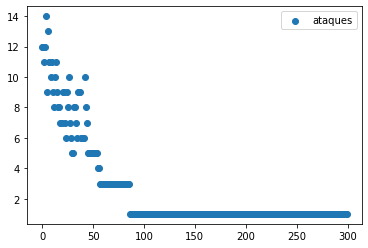

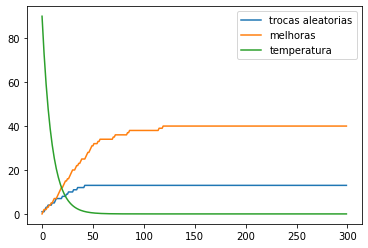



EXECUTANDO CASO 8
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.7342482767130922
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 7;	 estocasticidade: 0.9729380749443651 que eh maior que o random: 0.5808190925471537
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 10;	 estocasticidade: 0.932681303164806 que eh maior que o random: 0.3522620553371547
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9652124353467894 que eh maior que o random: 0.11413890563366336
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 5;	 estocasticidade: 0.9162877340484868 que eh maior que o random: 0.7405559687991168
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 9;	 estocasticidade: 0.823429428563224 que eh maior que o random: 0.6687886583502388
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.8821739667436626 que eh maior que o random: 0.661

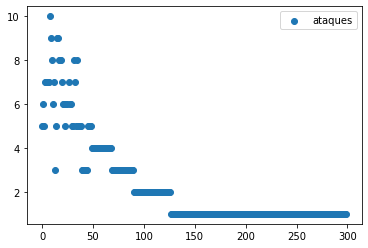

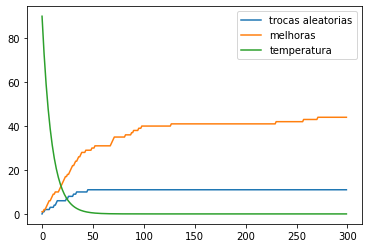



EXECUTANDO CASO 9
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 11;	 estocasticidade: 0.9607894391523232 que eh maior que o random: 0.89049864785064
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.9649275292919299
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.5268347092666457
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 10;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.8762276925590219
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9793095310273314 que eh maior que o random: 0.9528105818616001
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.346116026873068
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9652124353467894 que eh maior que o random: 0.62

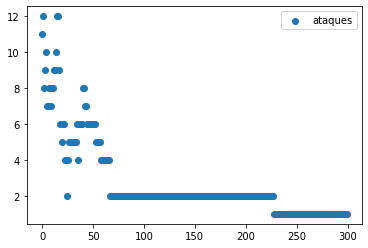

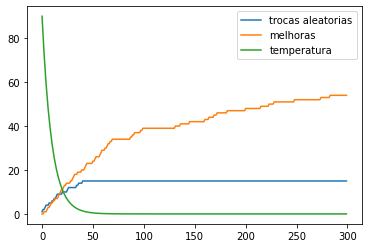



Relatorio ->	 4 de 10 buscas com sucesso;	media das iteracoes: 165.75;	desvio padrao: 66.94914114460319


In [ ]:
# Questao 4 letra d) com 8 rainhas
# Segundo item
T = tabuleiro(8)[0]
testarCasos(T,100,300,0.9)

# Conclusao:  com maximo de 100 iteracoes nao foi obtido sucesso, mas apenas a partir de 150 iteracoes
#             a partir de 300 iteracoes comecamos a ter maior indice de sucesso nas buscas



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9672161004820059 que eh maior que o random: 0.06723783256129123
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9591894571091382 que eh maior que o random: 0.8185496056269599
Tabuleiro final: [2, 5, 3, 0, 7, 4, 1, 7] com 500 iteracoes e falha na busca


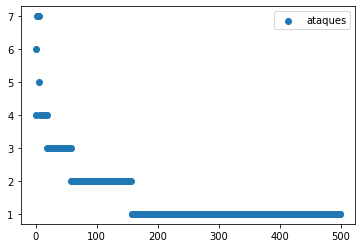

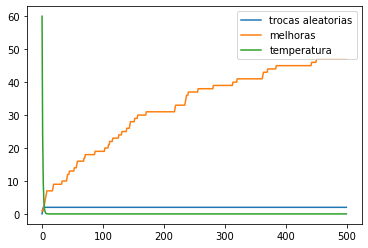



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9933555062550344 que eh maior que o random: 0.0393705035286126
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 4;	 estocasticidade: 0.9591894571091382 que eh maior que o random: 0.8255427466517598
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9010751057212906 que eh maior que o random: 0.37507115997311025
Tabuleiro final: [2, 5, 7, 1, 3, 0, 6, 4] com 292 iteracoes e sucesso na busca


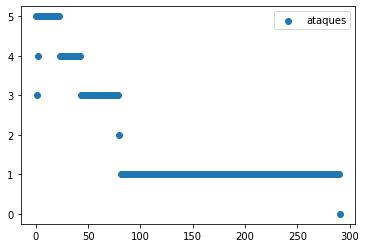

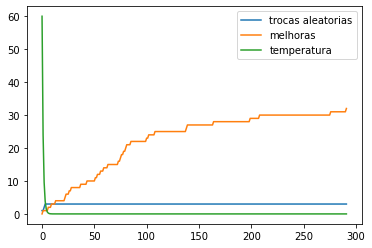



EXECUTANDO CASO 2
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9933555062550344 que eh maior que o random: 0.24296267758042223
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9834714538216175 que eh maior que o random: 0.78206057294005
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9010751057212906 que eh maior que o random: 0.14978717594143576
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.7707303812317476 que eh maior que o random: 0.2916127218561334
Tabuleiro final: [4, 7, 3, 0, 6, 1, 5, 2] com 188 iteracoes e sucesso na busca


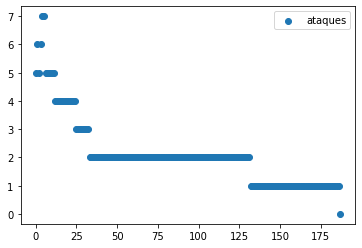

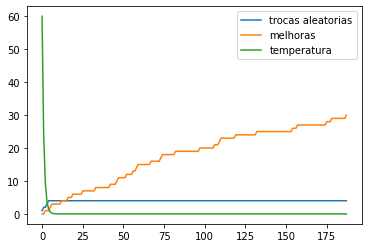



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9933555062550344 que eh maior que o random: 0.4359062414638668
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 9;	 estocasticidade: 0.9355069850316178 que eh maior que o random: 0.663800281451733
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 11;	 estocasticidade: 0.9200444146293233 que eh maior que o random: 0.717093936806173
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.7707303812317476 que eh maior que o random: 0.5178086747840159
Tabuleiro final: [5, 3, 6, 0, 7, 1, 4, 2] com 237 iteracoes e sucesso na busca


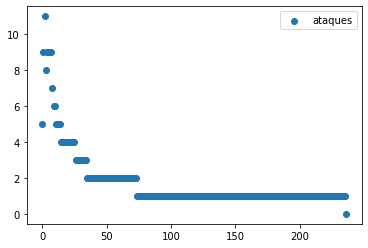

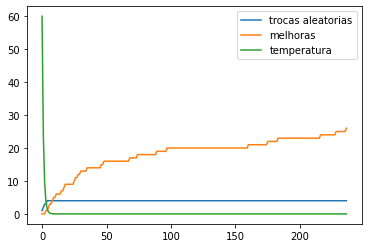



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9933555062550344 que eh maior que o random: 0.6920157960326963
Troca aleatoria ->	 ataques atual: 5 e ataques proximo: 6;	 estocasticidade: 0.9834714538216175 que eh maior que o random: 0.15276006077245108
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9591894571091382 que eh maior que o random: 0.555331319991183
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9010751057212906 que eh maior que o random: 0.6571644799368743
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 11;	 estocasticidade: 0.4578333617716143 que eh maior que o random: 0.20927343317740132
Tabuleiro final: [6, 6, 3, 0, 4, 7, 5, 2] com 500 iteracoes e falha na busca


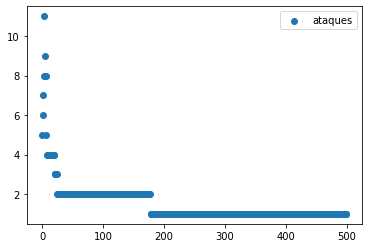

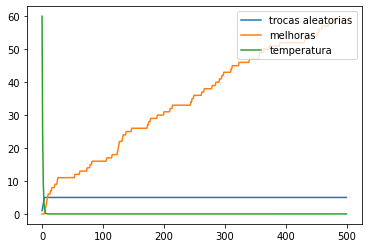



EXECUTANDO CASO 5
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 5;	 estocasticidade: 0.9834714538216175 que eh maior que o random: 0.5101841652127208
Tabuleiro final: [0, 4, 7, 1, 6, 2, 5, 3] com 500 iteracoes e falha na busca


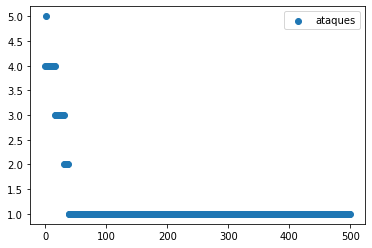

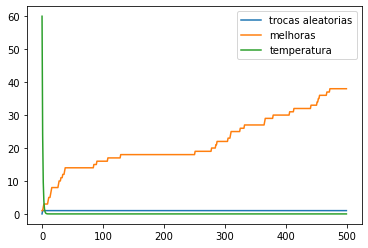



EXECUTANDO CASO 6
Troca aleatoria ->	 ataques atual: 3 e ataques proximo: 6;	 estocasticidade: 0.8824969025845955 que eh maior que o random: 0.739594533740935
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 8;	 estocasticidade: 0.811936346150635 que eh maior que o random: 0.2807360113772316
Tabuleiro final: [5, 2, 0, 6, 4, 7, 1, 3] com 361 iteracoes e sucesso na busca


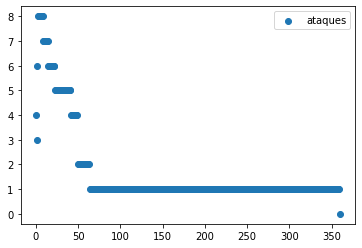

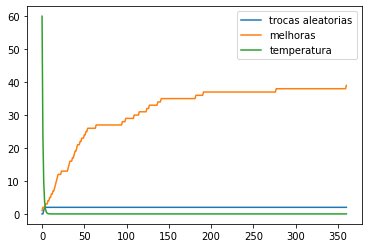



EXECUTANDO CASO 7
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9672161004820059 que eh maior que o random: 0.34059888411844463
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.811936346150635 que eh maior que o random: 0.15113272956237955
Tabuleiro final: [3, 0, 4, 7, 5, 2, 6, 1] com 401 iteracoes e sucesso na busca


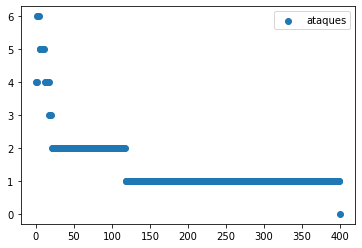

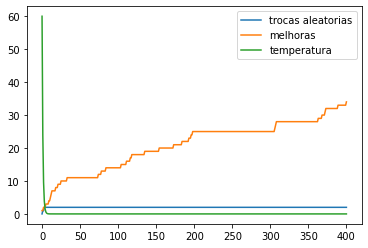



EXECUTANDO CASO 8
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 7;	 estocasticidade: 0.9801986733067553 que eh maior que o random: 0.06058205151797014
Troca aleatoria ->	 ataques atual: 7 e ataques proximo: 8;	 estocasticidade: 0.9834714538216175 que eh maior que o random: 0.0191906620958604
Troca aleatoria ->	 ataques atual: 8 e ataques proximo: 9;	 estocasticidade: 0.9591894571091382 que eh maior que o random: 0.29254230125079117
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 10;	 estocasticidade: 0.9010751057212906 que eh maior que o random: 0.8972297091412601
Tabuleiro final: [3, 1, 4, 2, 0, 2, 7, 5] com 500 iteracoes e falha na busca


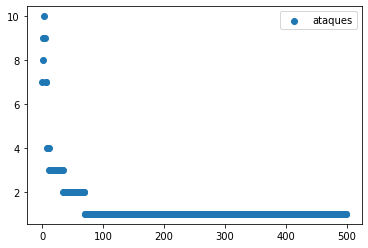

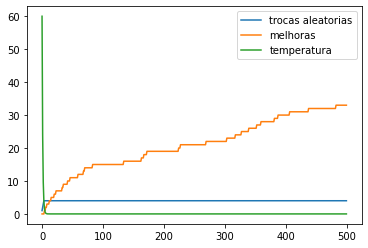



EXECUTANDO CASO 9
Troca aleatoria ->	 ataques atual: 4 e ataques proximo: 6;	 estocasticidade: 0.9867551618071957 que eh maior que o random: 0.5502267373223763
Troca aleatoria ->	 ataques atual: 6 e ataques proximo: 7;	 estocasticidade: 0.9834714538216175 que eh maior que o random: 0.6873267763805296
Tabuleiro final: [7, 3, 6, 4, 1, 5, 0, 2] com 500 iteracoes e falha na busca


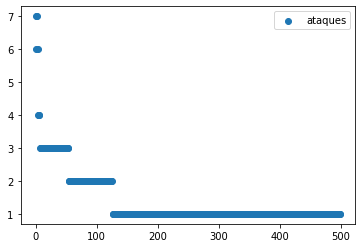

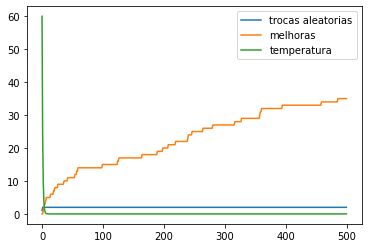



Relatorio ->	 5 de 10 buscas com sucesso;	media das iteracoes: 295.8;	desvio padrao: 77.98820423628179


In [ ]:
# Questao 4 letra d) com 8 rainhas
# Terceiro item
T = tabuleiro(8)[0]
testarCasos(T,150,500,0.4)

# Conclusao: com baixo limite da quantidade de iteracoes, nao tivemos sucesso nas buscas
# aliando limite de 500 rodadas com variacoes na temperatura e alpha, geralmente metade das buscas tem sucesso



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.8935146556288309
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 13;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.7509022937379632
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.32585059087081925
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 15;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.4819162644548951
Troca aleatoria ->	 ataques atual: 15 e ataques proximo: 16;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.8322586551255016
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.4474165038226008
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 13;	 estocasticidade: 0.9572291961951885 que eh maior que 

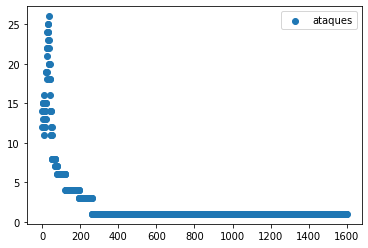

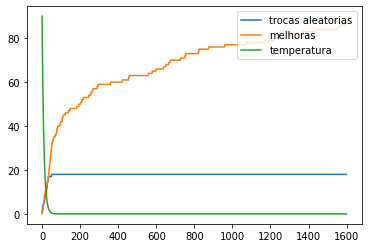



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.25545044158883123
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 15;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.16620427536451166
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 16;	 estocasticidade: 0.9729380749443651 que eh maior que o random: 0.4242480520302938
Troca aleatoria ->	 ataques atual: 16 e ataques proximo: 17;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.09328303996518483
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 14;	 estocasticidade: 0.8752468955286333 que eh maior que o random: 0.23937218116816417
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 15;	 estocasticidade: 0.9210392440263622 que eh maior que o random: 0.7369984315089151
Troca aleatoria ->	 ataques atual: 15 e ataques proximo: 16;	 estocasticidade: 0.8933030436367226 que eh maior q

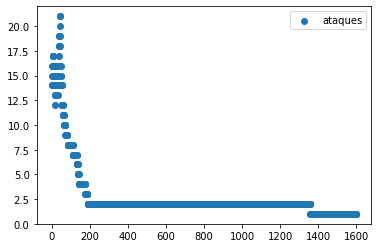

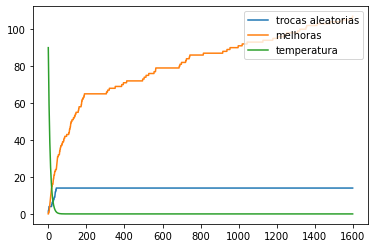



EXECUTANDO CASO 2
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 15;	 estocasticidade: 0.9780228724846005 que eh maior que o random: 0.25053359279184395
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.8725473444384335
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 13;	 estocasticidade: 0.9813591658699202 que eh maior que o random: 0.06301842223430465
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9793095310273314 que eh maior que o random: 0.14388368897852777
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 16;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.07870965162308452
Troca aleatoria ->	 ataques atual: 16 e ataques proximo: 18;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.3432864878031405
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 20;	 estocasticidade: 0.9382557515469004 que eh maior q

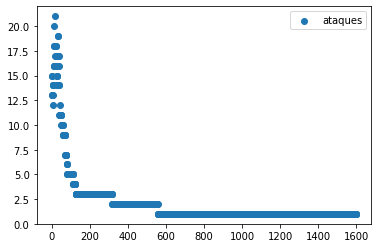

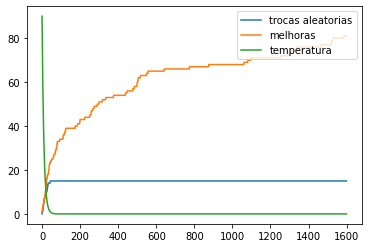



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.7364965756263625
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 12;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.4858145331728405
Troca aleatoria ->	 ataques atual: 9 e ataques proximo: 10;	 estocasticidade: 0.974518527484519 que eh maior que o random: 0.683708862887488
Troca aleatoria ->	 ataques atual: 10 e ataques proximo: 11;	 estocasticidade: 0.9686360263519526 que eh maior que o random: 0.2065140683951575
Troca aleatoria ->	 ataques atual: 11 e ataques proximo: 13;	 estocasticidade: 0.9243334838985968 que eh maior que o random: 0.599431463740877
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 16;	 estocasticidade: 0.8770973711467438 que eh maior que o random: 0.09912011807937293
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 14;	 estocasticidade: 0.8623839066518937 que eh maior que o ra

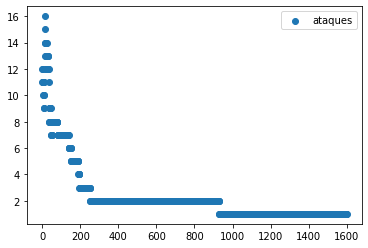

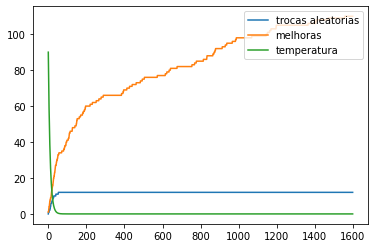



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.7399067239212684
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 15;	 estocasticidade: 0.9889503892939223 que eh maior que o random: 0.04282880006496936
Troca aleatoria ->	 ataques atual: 15 e ataques proximo: 16;	 estocasticidade: 0.9877302162356105 que eh maior que o random: 0.2506099963096705
Troca aleatoria ->	 ataques atual: 16 e ataques proximo: 18;	 estocasticidade: 0.9729380749443651 que eh maior que o random: 0.8744948143926201
Troca aleatoria ->	 ataques atual: 17 e ataques proximo: 18;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.7515389294342223
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 21;	 estocasticidade: 0.9451134623709186 que eh maior que o random: 0.3759521642740643
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 21;	 estocasticidade: 0.9254869535194653 que eh maior que 

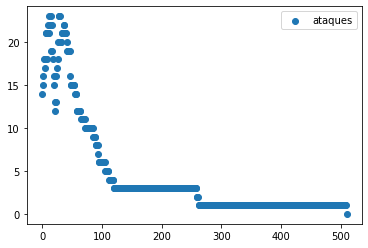

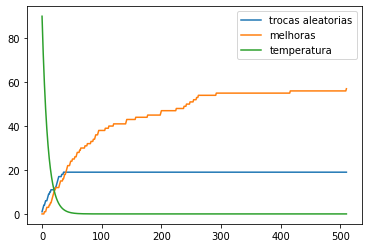



Relatorio ->	 1 de 5 buscas com sucesso;	media das iteracoes: 511.0;	desvio padrao: 0.0


In [ ]:
# Questao 4 letra d) com 16 rainhas
# Primeiro item
T = tabuleiro(16)[0]
testarCasos(T,100,1600,0.9, True, 5)

# Conclusao: para tabuleiros maiores necessario mais iteracoes



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 17;	 estocasticidade: 0.9451134623709186 que eh maior que o random: 0.7799425077600982
Troca aleatoria ->	 ataques atual: 17 e ataques proximo: 19;	 estocasticidade: 0.9590471575609717 que eh maior que o random: 0.7904280460988138
Troca aleatoria ->	 ataques atual: 17 e ataques proximo: 19;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.4326110560184755
Troca aleatoria ->	 ataques atual: 17 e ataques proximo: 21;	 estocasticidade: 0.8679438577207189 que eh maior que o random: 0.09647472888257913
Troca aleatoria ->	 ataques atual: 21 e ataques proximo: 22;	 estocasticidade: 0.9572291961951885 que eh maior que o random: 0.4605058257665312
Troca aleatoria ->	 ataques atual: 22 e ataques proximo: 23;	 estocasticidade: 0.9525912676693631 que eh maior que o random: 0.8023319854703588
Troca aleatoria ->	 ataques atual: 23 e ataques proximo: 24;	 estocasticidade: 0.9474643644864255 que eh maior que 

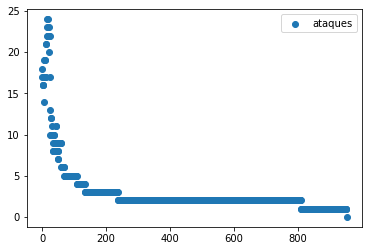

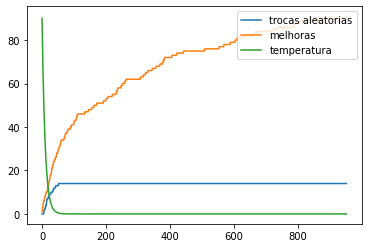



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 21;	 estocasticidade: 0.9704455335485082 que eh maior que o random: 0.21255221034841387
Troca aleatoria ->	 ataques atual: 19 e ataques proximo: 23;	 estocasticidade: 0.9197714504257793 que eh maior que o random: 0.020206821228097138
Troca aleatoria ->	 ataques atual: 23 e ataques proximo: 26;	 estocasticidade: 0.932681303164806 que eh maior que o random: 0.8631562003922022
Troca aleatoria ->	 ataques atual: 24 e ataques proximo: 25;	 estocasticidade: 0.9717276396502361 que eh maior que o random: 0.6729923486925923
Troca aleatoria ->	 ataques atual: 24 e ataques proximo: 29;	 estocasticidade: 0.8377502046549022 que eh maior que o random: 0.23731090194618765
Troca aleatoria ->	 ataques atual: 21 e ataques proximo: 23;	 estocasticidade: 0.8483132890366527 que eh maior que o random: 0.6742161544794388
Troca aleatoria ->	 ataques atual: 23 e ataques proximo: 27;	 estocasticidade: 0.6938029728646244 que eh maior qu

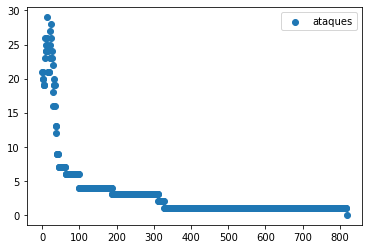

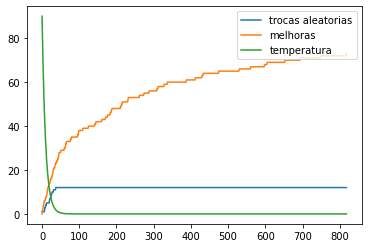



EXECUTANDO CASO 2
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9848739859620906 que eh maior que o random: 0.5644420510778982
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 17;	 estocasticidade: 0.9504637425653076 que eh maior que o random: 0.8119141912488672
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 17;	 estocasticidade: 0.9112643096147104 que eh maior que o random: 0.8562434822097951
Troca aleatoria ->	 ataques atual: 15 e ataques proximo: 19;	 estocasticidade: 0.8916167603105362 que eh maior que o random: 0.4902217264419272
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 21;	 estocasticidade: 0.8886751340970557 que eh maior que o random: 0.4032766752053737
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 19;	 estocasticidade: 0.9525912676693631 que eh maior que o random: 0.6704214593780643
Troca aleatoria ->	 ataques atual: 19 e ataques proximo: 20;	 estocasticidade: 0.9474643644864255 que eh maior que o

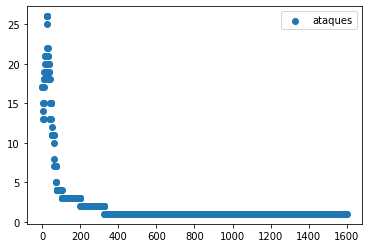

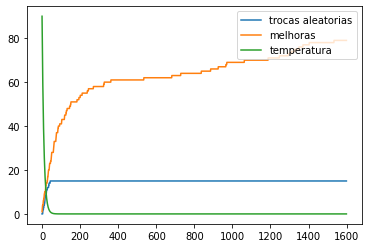



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 21;	 estocasticidade: 0.9636404443012863 que eh maior que o random: 0.44714914193304334
Troca aleatoria ->	 ataques atual: 21 e ataques proximo: 22;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.14167639528358644
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 15;	 estocasticidade: 0.9652124353467894 que eh maior que o random: 0.6880438609418655
Troca aleatoria ->	 ataques atual: 15 e ataques proximo: 17;	 estocasticidade: 0.9243334838985968 que eh maior que o random: 0.6457932444588425
Troca aleatoria ->	 ataques atual: 17 e ataques proximo: 18;	 estocasticidade: 0.9572291961951885 que eh maior que o random: 0.19661484486105207
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 19;	 estocasticidade: 0.9418001614474214 que eh maior que o random: 0.2896261153211914
Troca aleatoria ->	 ataques atual: 19 e ataques proximo: 23;	 estocasticidade: 0.7437060024521822 que eh maior qu

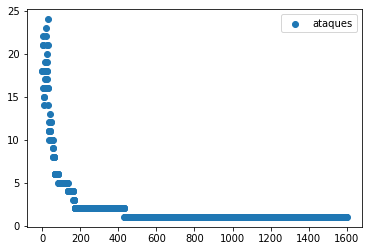

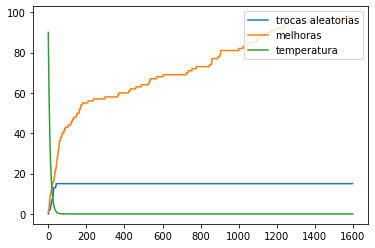



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 18 e ataques proximo: 19;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.2714415035375932
Troca aleatoria ->	 ataques atual: 16 e ataques proximo: 17;	 estocasticidade: 0.9863762339717869 que eh maior que o random: 0.345934660604894
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.6048863042591417
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 17;	 estocasticidade: 0.9451134623709186 que eh maior que o random: 0.006547208748414857
Troca aleatoria ->	 ataques atual: 15 e ataques proximo: 16;	 estocasticidade: 0.9770371792836173 que eh maior que o random: 0.5428050831269939
Troca aleatoria ->	 ataques atual: 16 e ataques proximo: 17;	 estocasticidade: 0.974518527484519 que eh maior que o random: 0.6493738895437293
Troca aleatoria ->	 ataques atual: 17 e ataques proximo: 19;	 estocasticidade: 0.9442546056602192 que eh maior que o

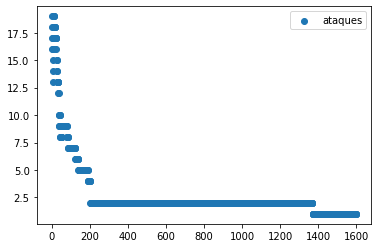

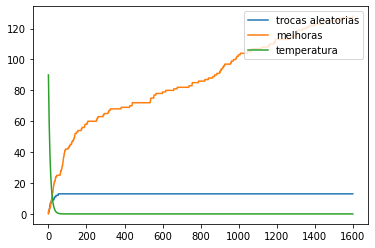



Relatorio ->	 2 de 5 buscas com sucesso;	media das iteracoes: 886.0;	desvio padrao das iteracoes: 67.0


In [ ]:
# Questao 4 letra d) com 16 rainhas
# Segundo item
T = tabuleiro(16)[0]
testarCasos(T,100,1600,0.9, True, 5)

# Conclusao: para tabuleiros maiores necessario mais iteracoes



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 13 e ataques proximo: 14;	 estocasticidade: 0.7066482778577162 que eh maior que o random: 0.5364440398702324
Tabuleiro final: [11, 8, 6, 13, 2, 0, 14, 10, 5, 1, 15, 12, 3, 9, 7, 4] com 518 iteracoes e sucesso na busca


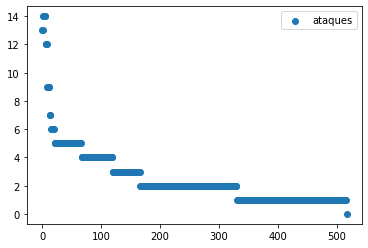

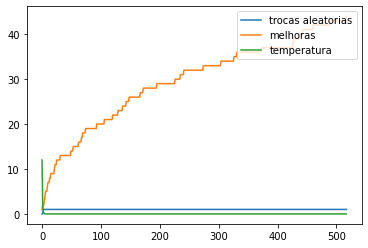



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 14 e ataques proximo: 15;	 estocasticidade: 0.9801986733067553 que eh maior que o random: 0.9125030768166466
Troca aleatoria ->	 ataques atual: 15 e ataques proximo: 16;	 estocasticidade: 0.9200444146293233 que eh maior que o random: 0.7074121387903903
Tabuleiro final: [2, 10, 6, 15, 9, 12, 3, 13, 4, 7, 0, 14, 11, 1, 5, 15] com 1600 iteracoes e falha na busca


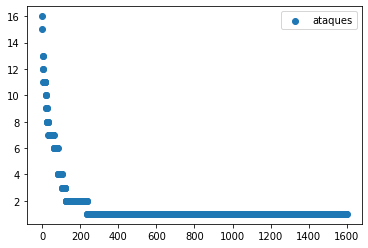

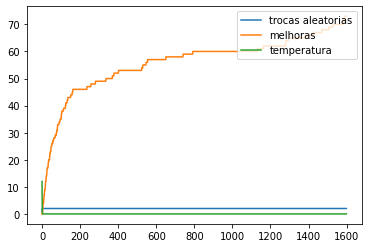



EXECUTANDO CASO 2
Tabuleiro final: [4, 11, 8, 5, 12, 2, 15, 6, 15, 0, 10, 14, 7, 1, 3, 9] com 1600 iteracoes e falha na busca


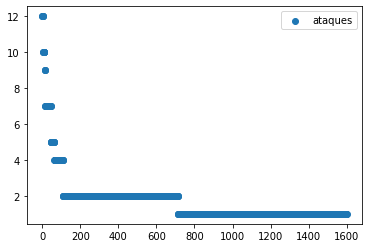

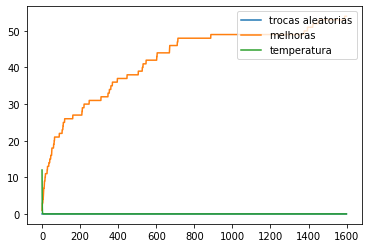



EXECUTANDO CASO 3
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 14;	 estocasticidade: 0.05538101029109323 que eh maior que o random: 0.020310880694997313
Tabuleiro final: [8, 1, 9, 15, 6, 7, 0, 2, 11, 13, 3, 10, 4, 14, 12, 5] com 1600 iteracoes e falha na busca


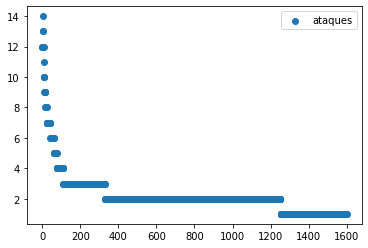

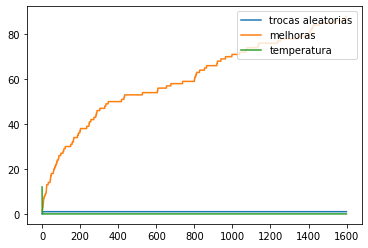



EXECUTANDO CASO 4
Troca aleatoria ->	 ataques atual: 12 e ataques proximo: 14;	 estocasticidade: 0.8464817248906141 que eh maior que o random: 0.48168754554905757
Tabuleiro final: [4, 14, 8, 11, 1, 3, 6, 0, 10, 12, 15, 5, 7, 9, 13, 2] com 1066 iteracoes e sucesso na busca


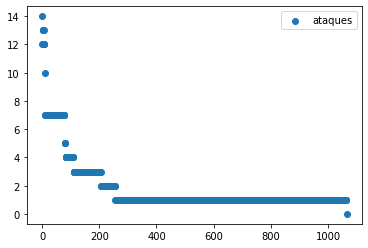

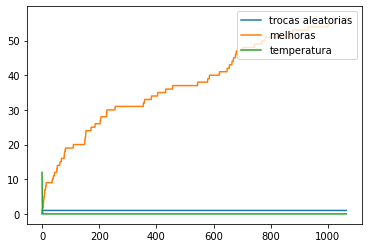



Relatorio ->	 2 de 5 buscas com sucesso;	media das iteracoes: 792.0;	desvio padrao das iteracoes: 274.0


In [ ]:
# Questao 4 letra d) com 16 rainhas
# Terceiro item
T = tabuleiro(16)[0]
testarCasos(T,50,1600,0.24, True, 5)

# Conclusao: para tabuleiros maiores necessario mais iteracoes



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 36 e ataques proximo: 37;	 estocasticidade: 0.9900498337491681 que eh maior que o random: 0.8330237889029048
Troca aleatoria ->	 ataques atual: 35 e ataques proximo: 39;	 estocasticidade: 0.9466084976764471 que eh maior que o random: 0.37282525799659516
Troca aleatoria ->	 ataques atual: 37 e ataques proximo: 42;	 estocasticidade: 0.9102064644833054 que eh maior que o random: 0.685527482081022
Troca aleatoria ->	 ataques atual: 42 e ataques proximo: 44;	 estocasticidade: 0.9590471575609717 que eh maior que o random: 0.4970941144491444
Troca aleatoria ->	 ataques atual: 44 e ataques proximo: 48;	 estocasticidade: 0.9019041831499227 que eh maior que o random: 0.09433562106550064
Troca aleatoria ->	 ataques atual: 46 e ataques proximo: 48;	 estocasticidade: 0.9382557515469004 que eh maior que o random: 0.36838630997726307
Troca aleatoria ->	 ataques atual: 48 e ataques proximo: 49;	 estocasticidade: 0.9652124353467894 que eh maior que

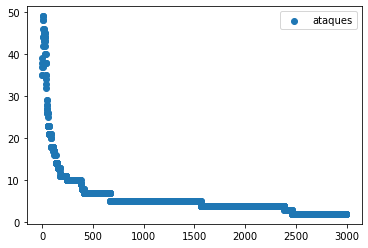

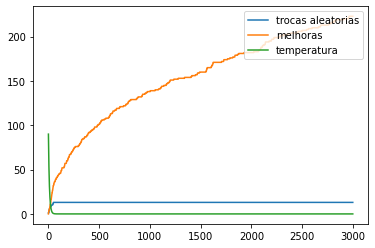



EXECUTANDO CASO 1
Troca aleatoria ->	 ataques atual: 33 e ataques proximo: 36;	 estocasticidade: 0.9596829942513829 que eh maior que o random: 0.050172480460315305
Troca aleatoria ->	 ataques atual: 36 e ataques proximo: 38;	 estocasticidade: 0.9630658124369055 que eh maior que o random: 0.2974822261625185
Troca aleatoria ->	 ataques atual: 38 e ataques proximo: 41;	 estocasticidade: 0.9392040221041305 que eh maior que o random: 0.4625552898433155
Troca aleatoria ->	 ataques atual: 35 e ataques proximo: 37;	 estocasticidade: 0.9442546056602192 que eh maior que o random: 0.8136310507149365
Troca aleatoria ->	 ataques atual: 33 e ataques proximo: 34;	 estocasticidade: 0.9614226354203425 que eh maior que o random: 0.48157175828609144
Troca aleatoria ->	 ataques atual: 34 e ataques proximo: 36;	 estocasticidade: 0.9162877340484868 que eh maior que o random: 0.12845576000433379
Troca aleatoria ->	 ataques atual: 35 e ataques proximo: 38;	 estocasticidade: 0.8188340022224042 que eh maior q

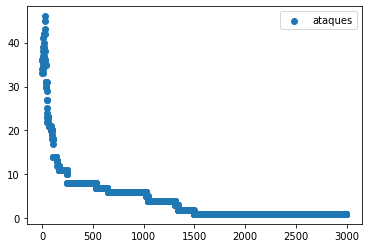

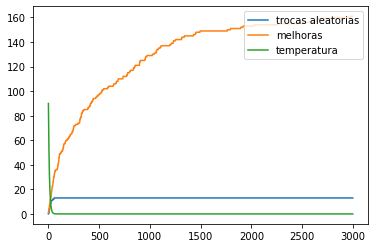



Relatorio ->	 0 de 2 buscas com sucesso;	media das iteracoes: nao houve busca com sucesso;	desvio padrao das iteracoes: nao houve busca com sucesso


In [ ]:
# Questao 4 letra d) com 32 rainhas
# Primeiro item
T = tabuleiro(32)[0]
testarCasos(T,100,10000,0.9, True, 1)

# Conclusao: para tabuleiros maiores necessario mais iteracoes



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 34 e ataques proximo: 38;	 estocasticidade: 0.9466084976764471 que eh maior que o random: 0.578676346035049
Troca aleatoria ->	 ataques atual: 38 e ataques proximo: 43;	 estocasticidade: 0.9266235460035683 que eh maior que o random: 0.824595076812531
Troca aleatoria ->	 ataques atual: 43 e ataques proximo: 44;	 estocasticidade: 0.9832075047174356 que eh maior que o random: 0.37239551202695664
Troca aleatoria ->	 ataques atual: 39 e ataques proximo: 41;	 estocasticidade: 0.9496863604105951 que eh maior que o random: 0.9284405688710532
Troca aleatoria ->	 ataques atual: 31 e ataques proximo: 33;	 estocasticidade: 0.8623839066518937 que eh maior que o random: 0.4817752112904289
Troca aleatoria ->	 ataques atual: 29 e ataques proximo: 33;	 estocasticidade: 0.6938029728646244 que eh maior que o random: 0.24430292502514428
Troca aleatoria ->	 ataques atual: 33 e ataques proximo: 34;	 estocasticidade: 0.8933030436367226 que eh maior que o

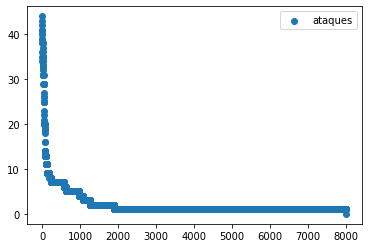

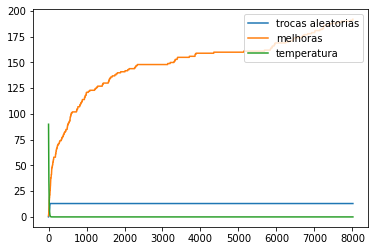



Relatorio ->	 1 de 1 buscas com sucesso;	media das iteracoes: 8015.0;	desvio padrao das iteracoes: 0.0


In [ ]:
# Questao 4 letra d) com 32 rainhas
# Segundo item
T = tabuleiro(32)[0]
testarCasos(T,100,10000,0.9, True, 1)

# Conclusao: para tabuleiros maiores necessario mais iteracoes



EXECUTANDO CASO 0
Troca aleatoria ->	 ataques atual: 32 e ataques proximo: 34;	 estocasticidade: 0.9960079893439915 que eh maior que o random: 0.6381432968025492
Troca aleatoria ->	 ataques atual: 34 e ataques proximo: 35;	 estocasticidade: 0.9976700170739584 que eh maior que o random: 0.5397823385746456
Troca aleatoria ->	 ataques atual: 35 e ataques proximo: 38;	 estocasticidade: 0.992660639637193 que eh maior que o random: 0.1710847459447764
Troca aleatoria ->	 ataques atual: 38 e ataques proximo: 41;	 estocasticidade: 0.9922758531223607 que eh maior que o random: 0.6043550986837665
Troca aleatoria ->	 ataques atual: 41 e ataques proximo: 42;	 estocasticidade: 0.9972829495971847 que eh maior que o random: 0.7504402051664523
Troca aleatoria ->	 ataques atual: 41 e ataques proximo: 42;	 estocasticidade: 0.9969898600443616 que eh maior que o random: 0.3177334784108652
Troca aleatoria ->	 ataques atual: 40 e ataques proximo: 41;	 estocasticidade: 0.9964900006683945 que eh maior que o 

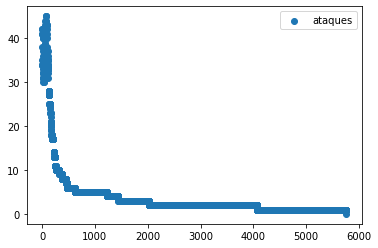

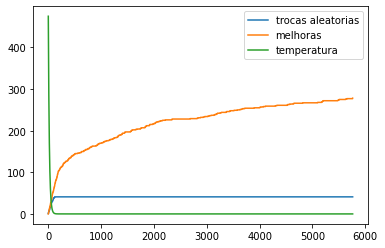



Relatorio ->	 1 de 1 buscas com sucesso;	media das iteracoes: 5762.0;	desvio padrao das iteracoes: 0.0


In [ ]:
# Questao 4 letra d) com 32 rainhas
# Terceiro item
T = tabuleiro(32)[0]
testarCasos(T,500,10000,0.95, True, 1)

# Conclusao: para tabuleiros maiores necessario mais iteracoes